<a href="https://colab.research.google.com/github/jodejetalo99/BDNE/blob/master/01_Calculo/Continuidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import sympify, lambdify

In [0]:
def plano_cartesiano():
  ax = plt.gca()
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

### Continuidad

Antes de comenzar, en las funciones que usaremos no indicaremos el dominio ni el contradominio. Salvo estpiluación de contrario, vamos a asumir que todas las funciones son de la forma $f: \mathbb{R}\rightarrow \mathbb{R}$.

Para cualquier función $f$ no necesariamente se cumple que $\lim_{x \to p}f(x)=f(p)$.

Por ejemplo, si consideramos la siguiente función: Sea $f:[0,5]\rightarrow [0,1]$ definida como:

$   f(x) = \left\{
\begin{array}{l}
      0 & x = 2 \\
      \
      \\
      1 & c.o.c. \\
\end{array} 
\right.$


Podemos notar que $\lim_{x⁺ \to 0}f(x)=\lim_{x- \to 0}f(x) = 1 \neq 0 = f(0)$

Además, en la siguiente gráfica, podemos comprobarlo:

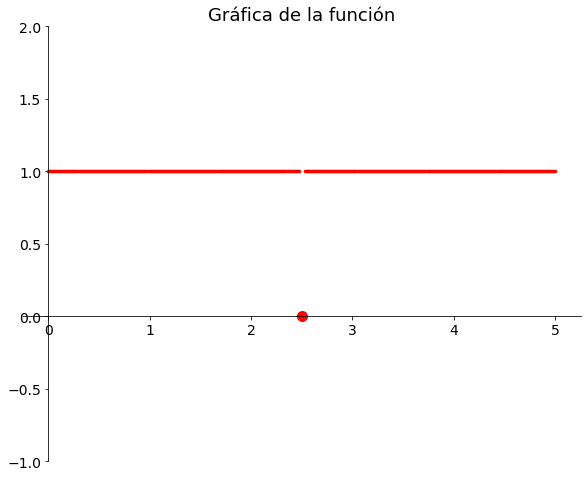

In [3]:
def f(x):
 if(x == 2.5): return 0
 else: return 1

x = np.arange(0., 5.01, 0.01)

y = []
for i in range(len(x)):
   y.append(f(x[i]))

plt.figure(figsize=(10, 8))
plano_cartesiano()
plt.plot(x[x<2.48],y[:248],c='red', ls='', ms=5, marker='.')
plt.scatter(2.5,0.,c='red',marker='o',s=100)
plt.plot(x[x>2.52],y[252:-1],c='red', ls='', ms=5, marker='.')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Gráfica de la función',fontsize=18)
#plt.xlabel('Dominio de la función',fontsize=14)
#plt.ylabel('Codominio de la función',fontsize=14)
plt.ylim([-1, 2])

plt.show()

Más aún, puede darse el caso en el que $\lim_{x \to p}f(x)$ ni siquiera exista, como en la siguiente función:

$f(x) = \frac{1}{x}$, ya que:

$\lim_{x^+ \to 0}f(x) = \lim_{x^+ \to 0}\frac{1}{x} = \infty \neq -\infty =\lim_{x^- \to 0}f(x) \frac{1}{x} =  \lim_{x^- \to 0}f(x)$.

Lo podemos verificar en la siguiente gráfica:


(-100.0, 100.0)

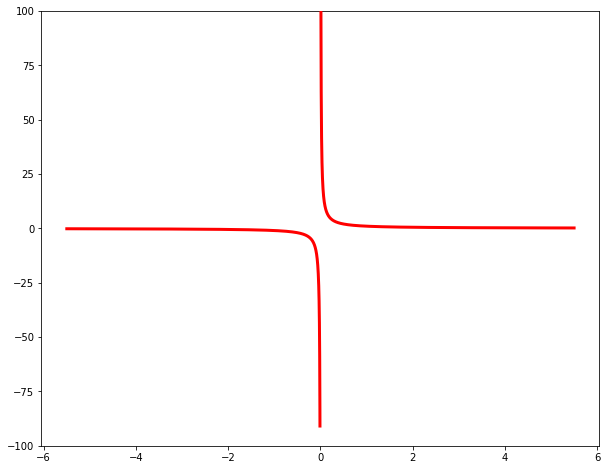

In [4]:
utol = 100.
ltol = -100.
xx = np.arange(-5.5,5.5,0.001) 
yy = 1/(xx)
yy[yy>utol] = np.inf
yy[yy<ltol] = -np.inf
plt.figure(figsize=(10, 8))
plt.plot(xx, yy, zorder=100, linewidth=3, color='red') 
plt.ylim(-100,100)

Parece ser anormal ver el comportamiento de las dos gráficas pasadas, ya que están desconectadas.

A aquellas funciones que no presentan esas 'anormalidades' se les conoce como funciones continuas. Una idea intuitiva de esto, es que si quisiéramos graficar a lápiz una función, tendríamos que soltar el lápiz (Aunque esto no siempre sucede para todas las funciones continuas, pues hay algunas excepciones, sin embargo; mantenemos esa idea como una primera introducción al tema).


Supongamos una función $f$ que tiene el valor $f(x)$ en un cierto punto $p$. Se dice que $f$ es continua en $p$ si en todo punto próximo $x$ el valor de la función $f(x)$ es próximo a $f(p)$.

Otro modo de expresar este hecho, es el siguiente: Si $x$ se mueve hacia $p$, el correspondiente valor de la función $f(x)$ debe llegar a ser tan próximo a $f(p)$ como se desee, cualquiera que sea la forma con que $x$ tienda a $p$. En los valores de una función continua no se presentan saltos bruscos.

Por lo tanto, podemos definir:

Una función $f$ es **continua** en un punto $p$ si y sólo si:

1. $\lim_{x \to p}f(x)=f(p)$
2. $f$ está definida en $p$

Más formalmente: Una función $f$ es continua en $p$ si para todo $\epsilon > 0$ existe un $\delta > 0$ tal que $|f(x)-f(p)| < \epsilon$
siempre que $0 < |x - p| < \delta$.


**Ejemplo**: Sea $f(x) = x^2$. Vamos a demostrar formalmente que $f$ es continua en $x=1$:
 
Primero notemos que $f$ está definida en $x=1$, pues como mencionamos anteriormente, asumimos que, salvo especificar lo contrario, nuestras funciones tendrían tanto al dominio como al contradominio a $\mathbb{R}$; y entonces $f(2) = 1^2=1$. Ahora bien, para probar la continuidad de $f$ en $x=1$, usando la definición tenemos que demostrar que $\lim_{x \to p}f(x)=f(p)$.

P.D. Para todo $\epsilon>0$ existe $\delta>0$ tal que si $0 < |x - 1|< \delta $, entonces $|x^2-1|<\epsilon$. Encontrar $\delta$ se logra más fácilmente trabajando hacia atrás. Manipulemos la segunda desigualdad que involucra a $\delta$ hasta que contenga un término de la forma $x-1$ como en la primera desigualdad:

$|x^2−1|=|x+1||x-1|$.

En lo anterior, hay un factor no deseado de $|x+1|$, que debe limitarse. Si nos aseguramos de que $\delta < 1$, entonces $|x-1| < \delta < 1$. Luego:

$|x-1| < \delta \Rightarrow |x-1| < 1 \Rightarrow -1 < x-1 < 1$. 

Sumando un 2 atodos los lados de la desigualdad anterior, obtenemos que:

$1 < x+1 < 3 \Rightarrow |x+1| < 3$. 

Por lo tanto, si $|x^2-1|=|x+1||x-1|< 3|x-1|<\epsilon \Rightarrow |x-1|< \frac{\epsilon}{3}$

Entonces, seleccionamos  $\delta=min\{1,\frac{\epsilon}{3}\}$

.

Checamos: Dada $\epsilon>0$, sea $\delta=min\{1,\frac{\epsilon}{3}\}$. Entonces $0<|x-1|<\delta$ implica que 
$|x^2-1|=|x+1||x-1|< 3 |x-1| < 3 \delta \leq 3\frac{\epsilon}{3}=\epsilon$.

$\therefore$ $\lim_{x \to 1}x^2=1=(1)^2$, lo cual quiere decir que $f$ es continua en $x=1$.

Además, se puede ver la siguiente figura la continuidad de esta función en dicho punto:



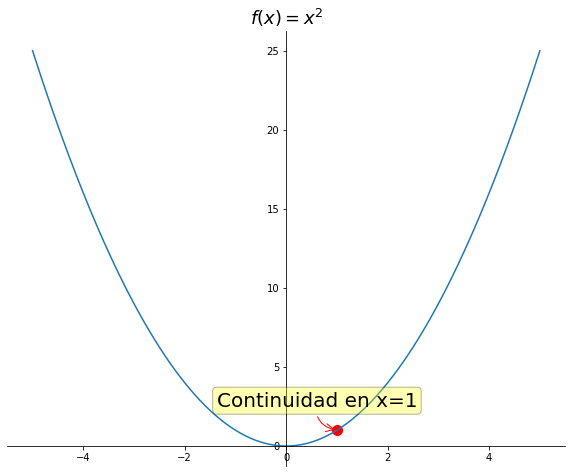

In [5]:
def x_cuadrada(x):
  return x**2

x4 = np.arange(-5, 5.1, 0.1) 

y4 = []
for i in range(len(x4)):
   y4.append(x_cuadrada(x4[i]))



fig = plt.figure(figsize=(10,8))
#plano_cartesiano()

plano_cartesiano()
plt.plot(x4, y4)
plt.scatter(1.,1.,c='red',marker='o',s=100)
plt.title('$f(x) = x^2$', fontsize=18)
plt.annotate('Continuidad en x=1', xy=(1, 1), xytext=(-20,20), fontsize=20,
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
plt.show()




 **Teorema** Sean f y g dos funciones continuas, es decir, son tales que
$\lim_{x \to p}f(x)=f(p)$ y $\lim_{x \to p}g(x)=g(p)$. Se tiene entonces
1. Si $f$ es una función constante $k$, se cumple que $\lim_{x \to p}f(x) =\lim_{x \to p}k = k = f(p)$
2. $\lim_{x \to p}f(x) + g(x) = f(p)+g(p)$.
3. $\lim_{x \to p}f(x) - g(x) = f(p)-g(p)$.
4. $\lim_{x \to p}f(x) \cdot g(x) = f(p) \cdot g(p)$.
5. Si $g(p) \neq 0$, se cumple que $\lim_{x \to p}\frac{f(x)}{g(x)} = \frac{f(p)}{g(p)}$.

**Teorema** Sean f y g dos funciones continuas en $g(p)$ y en $p$ respectivamente. Se tiene entonces que $ f \circ g$ es continua en $p$. Nóótese que se requiere que $f$ sea continua  en $g(p)$, pero no necesariamente tiene que serlo en $p$.


Los teoremas mostrados en este notebook se refieren a continuidad de funciones en un punto, pero el concepto de continuidad no empieza a ser interesante hasta que dirigimos nuestra atención a funciones que son continuas en todos los puntos de un intervalo. Sea $f$ continua en $x$, para todo $x$ en $(a,b)$, entonces se dice que $f$ es **continua** en $(a,b)$. La continuidad en un intervalo cerrado se define de modo más peculiar:

Una función $f$ se dice que es continua en  $[a,b]$ si y sólo si:

1. $f$ es continua en $x$ para todo $x$ en $(a,b)$, y
2. $\lim_{x \to p^+}f(x) = f(p)$ y $\lim_{x \to p^-}f(x) = f(p)$

**Teorema** Sea $f$ una función continua en $a$, y $f(a) > 0$. Entonces existe un número $\delta > 0$ tal que $f(x)>0$ para todo $x$ que satisface $|x-a| < \delta$. Análogamente, si $f(a) < 0$, entonces existe un número $\delta > 0$ tal que $f(x) < 0$ para todo $x$ que satisface $|x-a| < \delta$

**Teorema de intercalación** Sea $I$ un intervalo que contiene al punto $p$ y sean $f, g$ y $h$ funciones continuas en $I$. Supongamos que, para todo $x$ en $I$ y diferente de $p$, tenemos: $g(x)\leq f(x)\leq h(x)$; y supongamos también que: $g(p)=\lim _{x \to p}g(x)=\lim _{x\to p}h(x)=h(p)$. Entonces: $\lim _{x\to p}f(x)=f(p)=g(p)=h(p)$




## Tres Teoremas Fuertes 





**Teorema 1 (Valor Intermedio)** Si $f$ es continua en $[a,b]$ y $f(a)< c < f(b)$ ($f(a) > c > f(b)$), entonces existe algún $x \in [a,b]$ tal que $f(x) = c$.

Esto quiere decir que la gráfica de una función continua que empieza por debajo de la recta constante $y=c$  (Por arriba) y termina por encima de esta (o por debajo de esta) , entonces $f$ debe cruzar a esta recta en algún punto.

Podemos generalizar este teorema al siguiente:

**Teorema de los valores intermedios** Sea $f$ una función continua en $[a,b]$. Si $c$ y $d$ están en $[a,b]$, entonces $f$ toma todos los valores comprendidos entre $f(c)$ y $f(d)$.

**Ejemplo de aplicación** Demuestra que la función: $f(x) = x^3 - x^2 + x + 1$ tiene una raíz en el intervalo $[-1,1]$.

Para eso vamos a aplicar el teorema del valor intermedio. Dado que la función polinomial es continua en todo el conjunto de los números reales, si $N = f(x_0) = 0$ para algún $x_0$ que está en el intervalo $[-1,1]$, hacemos $a = -1$ y $b = 1$, y evaluamos la función en esos puntos:

$f(-1) = (-1)^3 - (-1)^2 + (-1) + 1 = -2 < 0$ 

$f(1) = (1)^3 - (1)^2 + (1) + 1 = 2 > 0$

Por lo que satisface con la condición de que $f(a) \leq k \leq f(b)$. Entonces, por la continuidad de la función, debe existir un número $x_0$ en el intervalo $[a,b]$ tal que $f(x_0) = k = 0$

A continuación mostramos la gráfica de la esta función. 

**Ejercicio** ¿Es posible encontrar el $x_0$ que satisface: $f(x_0) = 0$? En caso afirmativo, indique cómo. En caso negativo, explique el proqué.

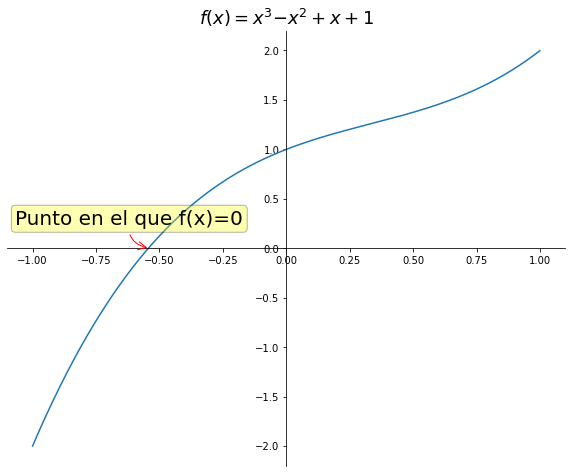

In [6]:
def f10(x):
  return x**3-x**2+x+1

x10 = np.arange(-1, 1, 0.001) 

y10 = []
for i in range(len(x10)):
   y10.append(f10(x10[i]))



fig = plt.figure(figsize=(10,8))
#plano_cartesiano()

plano_cartesiano()
plt.plot(x10, y10)
plt.title(r'$f(x) = x^3−x^2+x+1$', fontsize=18)
plt.annotate('Punto en el que f(x)=0', xy=(-0.54, 0), xytext=(-20,20), fontsize=20,
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
plt.show()
                 

**Teorema 2** Si $f$ es continua en $[a,b]$ entonces existen números $N_1,N_2$ tales que $N_1 \le f(x) \le N_2$, para toda $x$ en $[a,b]$. Esto es, $f$ está acotada superiormente e inferiormente en $[a,b]$. Más aún, podemos decir que existe un número $N$ tal que $|f(x)|\leq N$, para todo $x$ en $[a,b]$, es decir, podemos tomar a $N = max\{|N_1|,|N_2|\}$

Esto quiere decir que la gráfica de una función continua queda por debajo y por arriba de algunas rectas paralelas al eje $X$.



**Ejemplo** Usando la función del ejemplo anterior, vimos que $f(-1) =-2$ y $f(1)=2$. Por lo tanto, podemos proponer cualquier número $N$ mayor a dos, digamos $N=3$, de tal forma que dicha función esté acotada inferior y superiormente en $[-1,1]$.

Lo podemos visualizar en la siguiente figura:


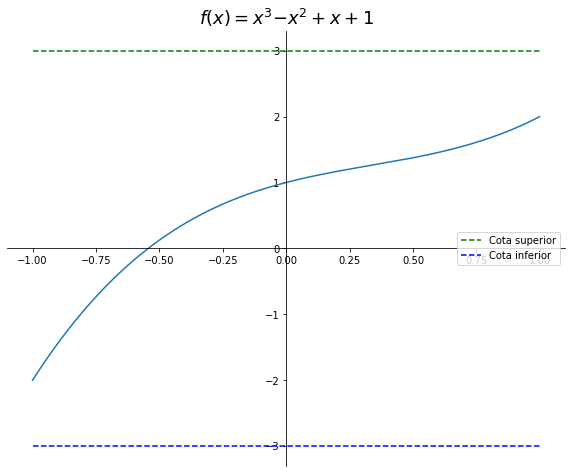

In [7]:
fig = plt.figure(figsize=(10,8))
#plano_cartesiano()
plt.plot([-1,1],[3,3], c ='green',linestyle='--',label = 'Cota superior')
plt.plot([-1,1],[-3,-3], c ='blue',linestyle='--',label = 'Cota inferior')
plt.legend(loc='best')
plano_cartesiano()
plt.plot(x10, y10)
plt.title(r'$f(x) = x^3−x^2+x+1$', fontsize=18)
plt.show()

**Teorema 3 (de los valores extremos)** Si $f$ es continua en $[a,b]$ entonces existen números $y,z$ en $[a,b]$ tal que $f(y) \le f(x) \le f(z)$ para toda $x$ en $[a,b]$. 

Esto quiere decir que una función continua en un intervalo cerrado alcanza su mínimo y su máximo en dicho intervalo.



**Ejemplo** Una vez más, consideremos la función $f(x) = x^3 - x^2 + x + 1$. Sabemos que $f$ es continua en [-1,1], por lo que según el teorema anterior, alcanza su máximo y su mínimo.

1. Entonces, Dado que $f(x)$ es continua, alcanzará un valor máximo y mínimo en algún punto del intervalo de $x = -1$ a $x = 3$ (así lo dice el teorema). Dado que la función es un polinomio, no habrá ser picos agudos o discontinuidades que preocuparse.

2. Encuontramos la derivada, la igualamos a cero y despejamos x. Luego encuentra el valor $f(x)$ en esa $x$:

$f'(x) = 3x^2 - 2x + 1  \Rightarrow 3x^2 - 2x + 1 = 0 $ Sin embargo, no podemos continuar, pues las raíces de este último polinomio de segundo grado son raíces complejas.


3. Verifique los puntos extremos. Esto significa valuar $f(-1)$ y $f(1)$. Y obtuvimos que $f(-1)=-2$ y $f(1)=2$, lo cual quiere decir que $y=-1$ y $z=1$ son los puntos en los que $f(x)$ alcanza su mínimo y su máximo respectivamente.



No handles with labels found to put in legend.


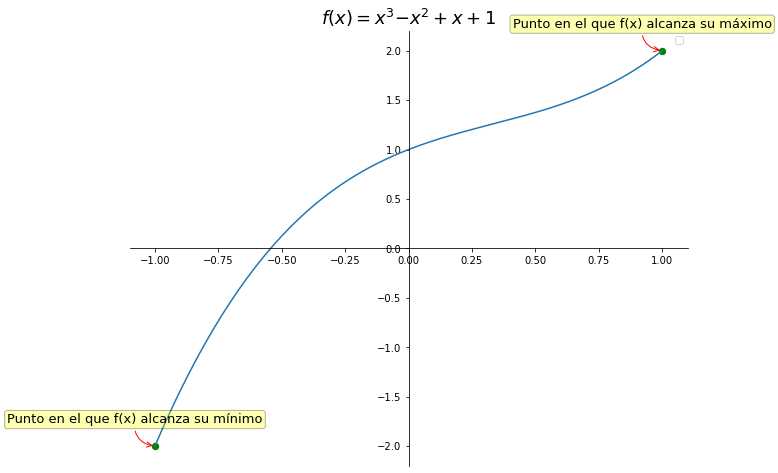

In [8]:
fig = plt.figure(figsize=(10,8))
#plano_cartesiano()
plt.legend(loc='best')
plano_cartesiano()
plt.plot(x10, y10)
plt.title(r'$f(x) = x^3−x^2+x+1$', fontsize=18)
plt.annotate('Punto en el que f(x) alcanza su máximo', xy=(1, 2), xytext=(-20,20), fontsize=13,
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
plt.scatter(1.,2.,c='green',marker='o',s=40)
plt.annotate('Punto en el que f(x) alcanza su mínimo', xy=(-1, -2), xytext=(-20,20), fontsize=13,
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))
plt.scatter(-1.,-2.,c='green',marker='o',s=40)
plt.show()